In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


## Read in data by chunks

In [2]:
previous =  'https://storage.googleapis.com/home_credit_files/previous_application.csv'
train_main = 'https://storage.googleapis.com/home_credit_files/application_train.csv'
test_main =  'https://storage.googleapis.com/home_credit_files/application_test.csv'

chunk_size = 25000

# Initialize empty list to store chunks
chunks_train = []
chunks_test = []
chunks_previous = []

# Read train data in chunks
for train_chunk in pd.read_csv(train_main, index_col=False, chunksize=chunk_size, low_memory=False,nrows=100000):
    # Process train_chunk here (e.g., clean, transform, analyze)
    chunks_train.append(train_chunk)

# Concatenate train chunks to create final DataFrame
df_t = pd.concat(chunks_train, ignore_index=True)

# Read test data in chunks
for test_chunk in pd.read_csv(test_main, index_col=False, chunksize=chunk_size, low_memory=False):
    # Process test_chunk here (e.g., clean, transform, analyze)
    chunks_test.append(test_chunk)

# Concatenate test chunks to create final DataFrame
df_e = pd.concat(chunks_test, ignore_index=True)

# Read previous data in chunks
for prev_chunk in pd.read_csv(previous, index_col=False, chunksize=chunk_size, low_memory=False,nrows=100000):
    # Process prev_chunk here (e.g., clean, transform, analyze)
    chunks_previous.append(prev_chunk)

# Concatenate previous chunks to create final DataFrame
previous_app_df = pd.concat(chunks_previous, ignore_index=True)


## Reference Data Types

In [3]:
pd.set_option('display.max_rows', None)
data_types = df_t.dtypes
print(data_types)

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                       bool
FLAG_OWN_REALTY                    bool
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION                 int64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [4]:
pd.set_option('display.max_rows', None)
data_types = df_e.dtypes
print(data_types)

SK_ID_CURR                        int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64
FLAG_CONT_MOBILE                  int64


* Comment out heatmap

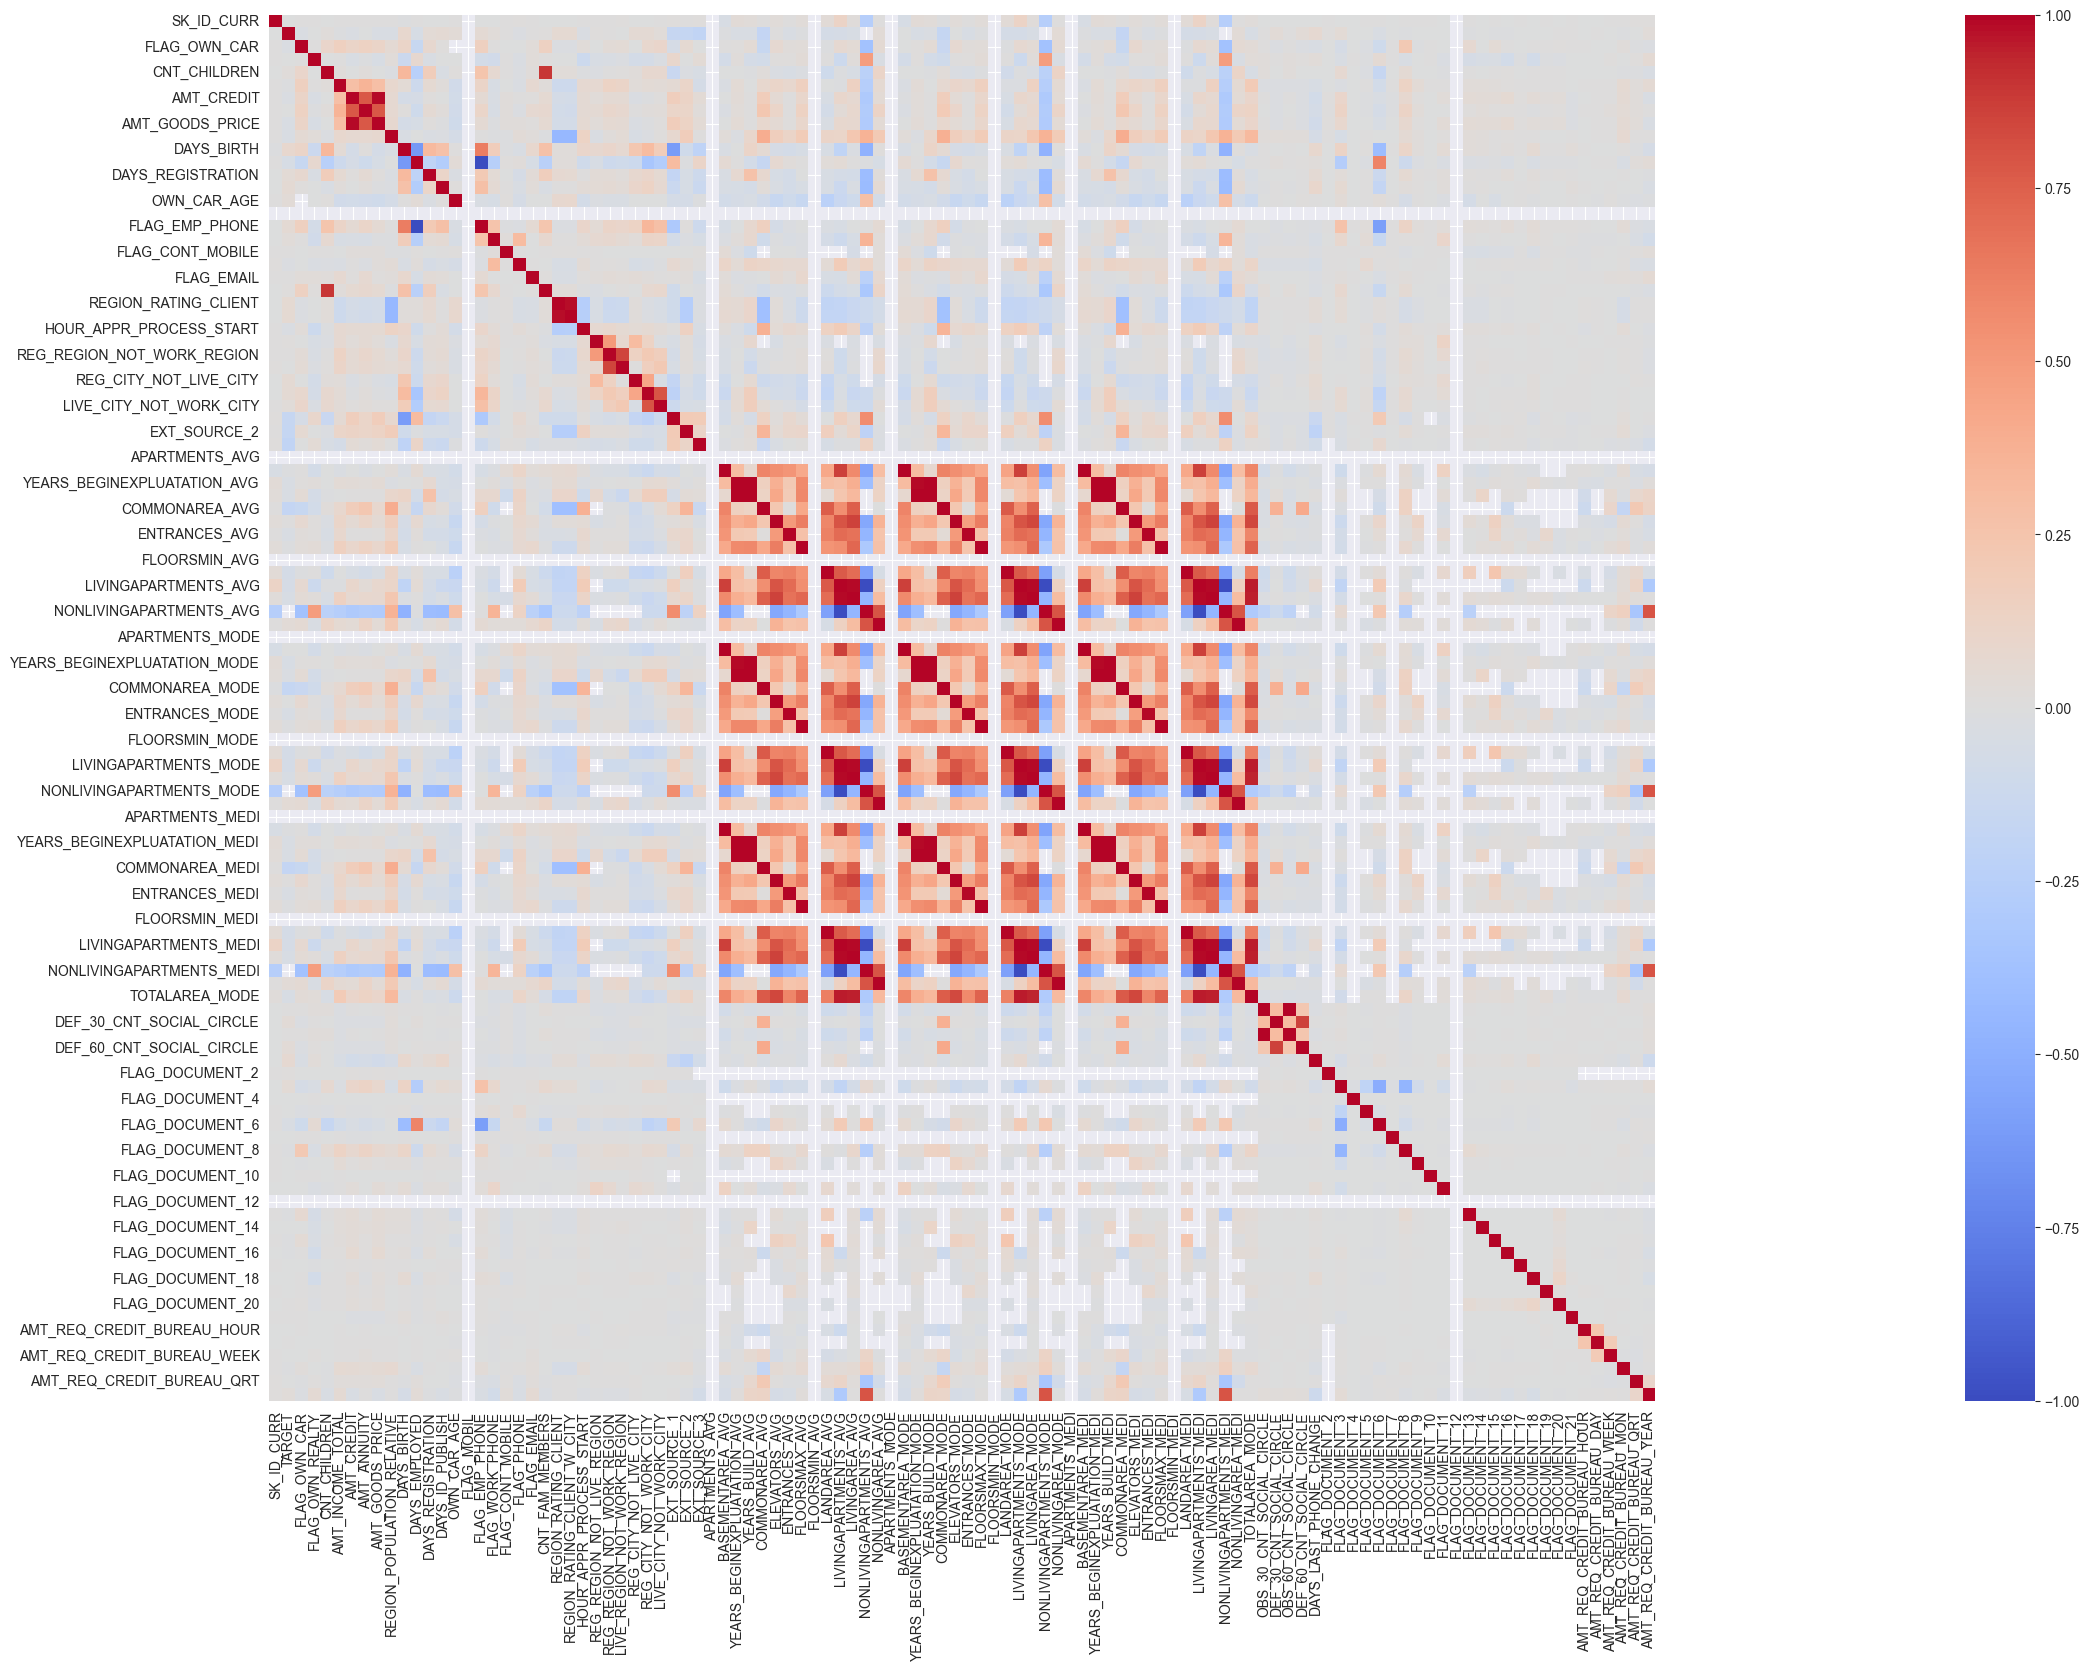

In [5]:
numeric_feats = df_t.dtypes[df_t.dtypes != "object"].index
plt.figure(figsize=(80,18))
sns.heatmap(df_t[numeric_feats].corr(), annot=False, square=True, cmap='coolwarm')
plt.show()

## Correlations

In [6]:
# Filter out object type columns from the DataFrame
numeric_df = df_t.select_dtypes(include=['int64', 'float64'])

# Compute correlations with the TARGET column
correlations = numeric_df.corr()['TARGET'].sort_values(ascending=False)

# Select the top 30 positive correlations
top_positive_correlations = correlations.head(30)

# Select the top 30 negative correlations
top_negative_correlations = correlations.tail(30)

# Display the results
print("Top 30 positive correlations:")
print(top_positive_correlations)
print("\nTop 30 negative correlations:")
print(top_negative_correlations)

Top 30 positive correlations:
TARGET                         1.000000
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
OWN_CAR_AGE                    0.037612
LIVE_CITY_NOT_WORK_CITY        0.032518
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
FLAG_WORK_PHONE                0.028524
AMT_REQ_CREDIT_BUREAU_YEAR     0.019930
CNT_CHILDREN                   0.019187
CNT_FAM_MEMBERS                0.009308
OBS_30_CNT_SOCIAL_CIRCLE       0.009131
OBS_60_CNT_SOCIAL_CIRCLE       0.009022
REG_REGION_NOT_WORK_REGION     0.006942
REG_REGION_NOT_LIVE_REGION     0.005576
FLAG_DOCUMENT_2                0.005417
FLAG_DOCUM

In [7]:
df_t.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Combine Train and Test

In [8]:
# Add a new column to indicate the source dataset
df_t['is_test'] = 0  # For train data, set to 0
df_e['is_test'] = 1   # For test data, set to 1

# Concatenate the train and test datasets
df_combined = pd.concat([df_t, df_e], ignore_index=True)

In [11]:
# KYLES CODE FOR CATEGORIZING
for col in df_combined.columns:
    if df_combined[col].dtype == 'object' and df_combined[col].nunique() < 25:
        df_combined[col] = df_combined[col].astype('category')

## Display numeric NA's

In [13]:
all_Xdata_na = (df_combined.isnull().sum() / len(df_combined)) * 100
all_Xdata_na = all_Xdata_na.drop(all_Xdata_na[all_Xdata_na == 0].index).sort_values(ascending=False)[:300]
missing_data = pd.DataFrame({'Missing Data Percent' :all_Xdata_na})

In [14]:
pd.set_option('display.max_rows', None)
missing_data

,Missing Data Percent
COMMONAREA_AVG,69.714109
COMMONAREA_MEDI,69.714109
COMMONAREA_MODE,69.714109
NONLIVINGAPARTMENTS_MEDI,69.293343
NONLIVINGAPARTMENTS_MODE,69.293343
NONLIVINGAPARTMENTS_AVG,69.293343
FONDKAPREMONT_MODE,68.235393
LIVINGAPARTMENTS_MEDI,68.203674
LIVINGAPARTMENTS_AVG,68.203674
LIVINGAPARTMENTS_MODE,68.203674


## Missing Numeric data to convert to median

In [15]:
for col in df_combined.columns:
    # Check if the column is of float64 data type and has missing or NA values
    if df_combined[col].dtype == 'float64' and df_combined[col].isnull().any():
        # Calculate the median of the column
        median_value = df_combined[col].median()
        # Fill missing values with the median
        df_combined[col].fillna(median_value, inplace=True)

## What missing data remains?

In [16]:
columns_with_missing_data = df_combined.columns[df_combined.isnull().any()].tolist()

# Display the columns with missing data
print(columns_with_missing_data)

['NAME_TYPE_SUITE', 'OCCUPATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']


## Object missing data

In [17]:
df_na_columns = df_combined[columns_with_missing_data]

# Show the head of the DataFrame
df_na_columns.head()

,NAME_TYPE_SUITE,OCCUPATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Unaccompanied,Laborers,reg oper account,block of flats,"Stone, brick",No
1,Family,Core staff,reg oper account,block of flats,Block,No
2,Unaccompanied,Laborers,NaN,NaN,NaN,NaN
3,Unaccompanied,Laborers,NaN,NaN,NaN,NaN
4,Unaccompanied,Core staff,NaN,NaN,NaN,NaN


In [18]:
pd.set_option('display.max_rows', None)
missing_percentages = (df_na_columns.isna().sum() / len(df_na_columns)) * 100
print(missing_percentages)

NAME_TYPE_SUITE         0.618377
OCCUPATION_TYPE        31.437032
FONDKAPREMONT_MODE     68.235393
HOUSETYPE_MODE         49.940632
WALLSMATERIAL_MODE     50.591290
EMERGENCYSTATE_MODE    47.147128
dtype: float64


In [19]:
for col in df_combined.columns:
    # Check if the column is of object data type and has missing or NA values
    if df_combined[col].dtype == 'object' and df_combined[col].isnull().any():
        # Calculate the mode of the column
        mode_values = df_combined[col].mode().iloc[0]
        # Fill missing values with the mode
        df_combined[col].fillna(mode_values, inplace=True)

## Categorical Data to be converted next. Take a look at any float or object data with less than 10 unique values and convert to category
* Except target
* Gender -> Category
* Name Contract type -> Category

### Convert Test back to it's own dataframe

In [20]:
df_e = df_combined[df_combined['is_test'] == 1]

# Remove the 'is_test' column from the combined DataFrame
df_combined.drop(columns=['is_test'], inplace=True)

In [21]:
df_t = df_combined.copy()

## Merged is Train and Application

In [22]:
# previous_app_df = pd.read_csv(f'previous_application.csv', index_col=False, low_memory=False)


df_merged = pd.merge(df_t, previous_app_df, on="SK_ID_CURR", how="left")


## Clean previous application
* Kyles Merge

In [23]:
for col in df_merged.columns:
    # Check if the column is of float64 data type and has missing or NA values
    if df_merged[col].dtype == 'float64' and df_merged[col].isnull().any():
        # Calculate the median of the column
        median_value = df_merged[col].median()
        # Fill missing values with the median
        df_merged[col].fillna(median_value, inplace=True)
        
        
missing_float = df_merged.columns[df_merged.isnull().any()].tolist()


for col in df_merged.columns:
    # Check if the column is of object data type and has missing or NA values
    if df_merged[col].dtype == 'object' and df_merged[col].isnull().any():
        # Calculate the mode of the column
        mode_values = df_merged[col].mode().iloc[0]
        # Fill missing values with the mode
        df_merged[col].fillna(mode_values, inplace=True)

missing_object = df_merged.columns[df_merged.isnull().any()].tolist()

# Display the columns with missing data
print(missing_float)
print(missing_object)

['NAME_TYPE_SUITE_x', 'OCCUPATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'NAME_CONTRACT_TYPE_y', 'WEEKDAY_APPR_PROCESS_START_y', 'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE_y', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION']
['NAME_TYPE_SUITE_x', 'OCCUPATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']


* Kyles Edits above to merged data

In [24]:
#for col in df_merged.columns:
 #   if df_merged[col].dtype == 'object' and df_merged[col].nunique() < 25:
  #      df_merged[col] = df_merged[col].astype('category')

In [25]:

# Perform one-hot encoding on the identified categorical variables
df_encoded = pd.get_dummies(df_merged, columns=missing_object)

# Optionally, if you want to limit one-hot encoding to specific columns, you can replace 'categorical_vars' with a subset of column names
# Example: df_encoded = pd.get_dummies(df, columns=['NAME_CONTRACT_TYPE_x', 'CODE_GENDER'])

# Check the shape of the original and encoded dataframe to understand the transformation
print("Original shape:", df_merged.shape)
print("Encoded shape:", df_encoded.shape)

# Display the first few rows of the encoded dataframe
#print(df_encoded.head())
#print(categorical_vars)

Original shape: (1687612, 158)
Encoded shape: (1687612, 193)


## REMOVE NA's AGAIN FOR COMBINED DF

In [26]:
#CLEAN NEW COMBINED DF
all_Xdata_na = (df_encoded.isnull().sum() / len(df_combined)) #* 100
all_Xdata_na = all_Xdata_na.drop(all_Xdata_na[all_Xdata_na == 0].index).sort_values(ascending=False)[:300]
missing_data = pd.DataFrame({'Missing Data Percent' :all_Xdata_na})

In [27]:
pd.set_option('display.max_rows', None)
missing_data

,Missing Data Percent


In [28]:
for col in df_encoded.columns:
    # Check if the column is of float64 data type and has missing or NA values
    if df_encoded[col].dtype == ['float64', 'float32'] and df_encoded[col].isnull().any():
        # Calculate the median of the column
        median_value = df_encoded[col].median()
        # Fill missing values with the median
        df_encoded[col].fillna(median_value, inplace=True)
        
print(df_encoded.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687612 entries, 0 to 1687611
Columns: 193 entries, SK_ID_CURR to EMERGENCYSTATE_MODE_Yes
dtypes: bool(41), category(9), float64(86), int64(40), object(17)
memory usage: 1.9+ GB
None


In [29]:
from sklearn.utils import resample

# Assuming df_combined is your combined DataFrame with 'TARGET' column and 'is_test' column

# Separate majority and minority classes
majority_class = df_encoded[df_encoded['TARGET'] == 0]
minority_class = df_encoded[df_encoded['TARGET'] == 1]

# Downsample majority class
desired_ratio = 0.3  # Desired ratio for majority to minority class
downsampled_majority = resample(majority_class, 
                                replace=False,  # Sample without replacement to avoid duplication
                                n_samples=int(len(minority_class) / desired_ratio),  # Downsample to match desired ratio
                                random_state=42)  # Set random state for reproducibility

# Combine minority class with downsampled majority class
df_downsampled = pd.concat([downsampled_majority, minority_class])

# Shuffle the DataFrame to mix up the order of the rows
df_downsampled = df_downsampled.sample(frac=1, random_state=42).reset_index(drop=True)


## Modeling

### Data Partition

In [30]:
from sklearn.model_selection import train_test_split

# Define your features (X) and target variable (y) based on your EDA
X = df_downsampled.drop(columns=['TARGET'])
y = df_downsampled['TARGET']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state=42)

# Check the shape of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)


Training set shape: (427578, 192) (427578,)
Validation set shape: (106895, 192) (106895,)


### Majority Class Classifier

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Majority class prediction:
majority_class_prediction = [0] * len(y_val)

# Calculate evaluation metrics for the majority class classifier
accuracy = accuracy_score(y_val, majority_class_prediction)

# Print the benchmark performance
print("Majority Class Classifier Performance:")
print("Accuracy:", accuracy)


Majority Class Classifier Performance:
Accuracy: 0.7705318303007624


### Random Forest

In [ ]:
# from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score

# Initialize models
# logistic_regression = LogisticRegression(random_state=42, max_iter=1000)
random_forest = RandomForestClassifier(random_state=42)
gradient_boosting = GradientBoostingClassifier(random_state=42)

# Fit models
# logistic_regression.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)

# Make predictions
# y_pred_lr = logistic_regression.predict(X_val)
y_pred_rf = random_forest.predict(X_val)
y_pred_gb = gradient_boosting.predict(X_val)

# Calculate evaluation metrics
metrics_lr = [accuracy_score, recall_score, f1_score, roc_auc_score]
metrics_rf_gb = [accuracy_score, recall_score, f1_score]

results = {}

# Logistic Regression Metrics
# results['Logistic Regression'] = {metric.__name__: metric(y_val, y_pred_lr) for metric in metrics_lr}

# Random Forest Metrics
results['Random Forest'] = {metric.__name__: metric(y_val, y_pred_rf) for metric in metrics_rf_gb}

# Gradient Boosting Metrics
results['Gradient Boosting'] = {metric.__name__: metric(y_val, y_pred_gb) for metric in metrics_rf_gb}

# Print results
for model, metrics in results.items():
    print(f"{model} Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print()

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score

# Drop the 'NAME_CONTRACT_TYPE' column from both X_train and X_val
#X_train.drop(columns=['ORGANIZATION_TYPE'], inplace=True, errors='ignore')  
#X_train.drop(columns=['NAME_CASH_LOAN_PURPOSE'], inplace=True, errors='ignore') 
#X_train.drop(columns=['NAME_GOODS_CATEGORY'], inplace=True, errors='ignore') 
#X_val.drop(columns=['ORGANIZATION_TYPE'], inplace=True, errors='ignore')  
#X_val.drop(columns=['NAME_CASH_LOAN_PURPOSE'], inplace=True, errors='ignore')  
#X_val.drop(columns=['NAME_GOODS_CATEGORY'], inplace=True, errors='ignore') 
# Initialize logistic regression model
model = LogisticRegression(random_state=42, max_iter=1000)

# Fit the model on training data
model.fit(X_train, y_train)

# Make predictions on validation set
y_pred = model.predict(X_val)
y_proba = model.predict_proba(X_val)[:, 1]

# Calculate evaluation metrics
accuracy = accuracy_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_proba)

# Print the evaluation metrics
print("Performance Metrics:")
print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC-ROC Score:", roc_auc)
